## London House Dataset 

kaggle link: https://www.kaggle.com/datasets/justinas/housing-in-london


In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("/content/London Housing Data.csv")
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [9]:
data.count()

date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64

In [17]:
# sum NAN values in each column
wellnull = data.isnull().sum()
wellnull

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [14]:
# see any rows that have missing data
data[data.isnull().any(axis=1)]

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


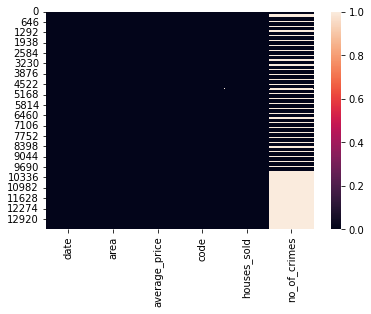

In [19]:
# visulize the null values in the dataset
sns.heatmap(data.isnull())

In [21]:
# look at the statistics of things
data.describe().T

,count,mean,std,min,25%,50%,75%,max
average_price,13549.0,263519.684331,187617.504910,40722.0,132380.0,222919.0,336843.0,1463378.0
houses_sold,13455.0,3893.994129,12114.402476,2.0,247.0,371.0,3146.0,132163.0
no_of_crimes,7439.0,2158.352063,902.087742,0.0,1623.0,2132.0,2582.0,7461.0


In [22]:
# look at the data types of the entire dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


We can see that the date column is actually an object and we need to tunr that into datatime
✈

In [23]:
# Data Cleaning

In [24]:
data.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [25]:
# change column date to datetime

data.date = pd.to_datetime(data.date)
# the first part is collecting the column date, then taking the function from pandas pd.datetime (then pass the column)

In [27]:
data.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [28]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


In [32]:
# Extract all the years from the column 

data["year"] = data.date.dt.year
data

# since the column has the datetime attribute we can extract the year


,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


In [ ]:
# Let's get the month

data["month"] = data.date.dt.month
data.insert(1,"Month",data.month)

In [47]:
data.drop(columns="month",inplace = True)

## Data Analysis

In [48]:
## show the records where number if crimes is zero
data[data.no_of_crimes==0]

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
72,2001-01-01,1,city of london,284262,E09000001,24.0,0.0,2001
73,2001-02-01,2,city of london,198137,E09000001,37.0,0.0,2001
74,2001-03-01,3,city of london,189033,E09000001,44.0,0.0,2001
75,2001-04-01,4,city of london,205494,E09000001,38.0,0.0,2001
76,2001-05-01,5,city of london,223459,E09000001,30.0,0.0,2001
...,...,...,...,...,...,...,...,...
178,2009-11-01,11,city of london,397909,E09000001,11.0,0.0,2009
179,2009-12-01,12,city of london,411955,E09000001,16.0,0.0,2009
180,2010-01-01,1,city of london,464436,E09000001,20.0,0.0,2010
181,2010-02-01,2,city of london,490525,E09000001,9.0,0.0,2010


In [49]:
len(data[data.no_of_crimes==0])

104

In [ ]:
# average price of home in england

In [50]:
data

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995
2,1995-03-01,3,city of london,79121,E09000001,14.0,NaN,1995
3,1995-04-01,4,city of london,77101,E09000001,7.0,NaN,1995
4,1995-05-01,5,city of london,84409,E09000001,10.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,9,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,12,england,250410,E92000001,NaN,NaN,2019


In [51]:
eng_data = data[data.area=="england"]
eng_data

,date,Month,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,1,england,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,2,england,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,3,england,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,4,england,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,5,england,53678,E92000001,64192.0,NaN,1995
...,...,...,...,...,...,...,...,...
13544,2019-09-01,9,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,10,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,11,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,12,england,250410,E92000001,NaN,NaN,2019


In [54]:
# use the groupby to determine the MAX average price by year 
eng_data.groupby('year').average_price.max()

year
1995     53901
1996     55755
1997     61564
1998     65743
1999     75071
2000     84191
2001     95992
2002    119982
2003    138985
2004    160330
2005    167244
2006    182031
2007    194764
2008    191750
2009    174136
2010    180807
2011    177335
2012    180129
2013    188544
2014    203639
2015    219582
2016    231922
2017    242628
2018    248620
2019    250410
2020    247355
Name: average_price, dtype: int64

In [55]:
# use the groupby to determine the MIN average price by year

eng_data.groupby('year').average_price.min()

year
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

In [59]:
# how many houses were sold per year

eng_data.groupby('year').houses_sold.sum()

year
1995     751627.0
1996     910236.0
1997    1030685.0
1998     990737.0
1999    1129428.0
2000    1058321.0
2001    1168167.0
2002    1263657.0
2003    1173155.0
2004    1192311.0
2005     997832.0
2006    1249080.0
2007    1198182.0
2008     607588.0
2009     588813.0
2010     626502.0
2011     625327.0
2012     634536.0
2013     760067.0
2014     901214.0
2015     895083.0
2016     889661.0
2017     876469.0
2018     843987.0
2019     714972.0
2020          0.0
Name: houses_sold, dtype: float64

In [61]:
# Crimes per area
data.groupby('area').no_of_crimes.max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

In [63]:
# highest to lowest order
data.groupby('area').no_of_crimes.min().sort_values(ascending=False)

area
westminster               3504.0
lambeth                   2381.0
southwark                 2267.0
newham                    2130.0
camden                    2079.0
croydon                   2031.0
islington                 1871.0
ealing                    1871.0
hackney                   1870.0
brent                     1850.0
barnet                    1703.0
lewisham                  1675.0
tower hamlets             1646.0
enfield                   1635.0
wandsworth                1582.0
waltham forest            1575.0
haringey                  1536.0
hounslow                  1529.0
greenwich                 1513.0
redbridge                 1487.0
hillingdon                1445.0
bromley                   1441.0
kensington and chelsea    1347.0
hammersmith and fulham    1323.0
barking and dagenham      1217.0
havering                  1130.0
harrow                     937.0
bexley                     860.0
merton                     819.0
sutton                     787.0
richm

In [66]:
# Show the total count of records of each area where the average price is less than 100000
data[data.average_price < 100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
enfield                  54
sutton                   54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              